<h1>Day 1</h1>

In [54]:
# read data
import re

myfile = open("data\day1.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1 = contents.split('\n')

for i in range(len(day1)):
    day1[i]=int(day1[i])

myfile = open("data\day1_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1_ex = contents.split('\n')

for i in range(len(day1_ex)):
    day1_ex[i]=int(day1_ex[i])

day1_ex
len(day1_ex)
for i in range(len(day1_ex)):
    print(i)

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

In [31]:
# solution day1 - part 1
def increase_sea_level(ls):
    step = 0
    for i in range(1, len(ls)):
        if ls[i] >= ls[i-1]:
            step+=1
    return step

print(increase_sea_level(day1_ex))
print(increase_sea_level(day1))
# solution day1 - part 2

def increase_sea_level_2(ls):
    step = 0
    sm_before = ls[0] + ls[1] + ls[2]
    for i in range(1, len(ls)-2):
        sm_new = ls[i] + ls[i+1] + ls[i+2]
        if sm_new > sm_before:
            step+=1
        sm_before = sm_new
    return step

print(increase_sea_level_2(day1_ex))
print(increase_sea_level_2(day1))


7
1446
5
1486


<h1>Day 2</h1>

In [33]:
# read data
import re

myfile = open("data\day2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2 = contents.split('\n')

for i in range(len(day2)):
    day2[i]=day2[i].split()

myfile = open("data\day2_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2_ex = contents.split('\n')

for i in range(len(day2_ex)):
    day2_ex[i]=day2_ex[i].split()

In [36]:
# solution day2 - part 1

def go_sub(ls):
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
        if s[0] == 'down':
            deph+=int(s[1])
        if s[0] == 'up':
            deph-=int(s[1])
    return horz*deph

print(go_sub(day2_ex))
print(go_sub(day2))


# solution day2 - part 2

def go_sub_2(ls):
    aim = 0
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
            deph+=int(s[1])*aim
        if s[0] == 'down':
            aim+=int(s[1])
        if s[0] == 'up':
            aim-=int(s[1])
    return horz*deph

print(go_sub_2(day2_ex))
print(go_sub_2(day2))



150
1427868
900
1568138742


<h1>Day 3 </h1>

In [56]:
# read data

myfile = open("data\day3.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3 = contents.split('\n')

myfile = open("data\day3_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3_ex = contents.split('\n')

In [75]:
import math

def gamma_epsilon(ls):
    gamma = []
    epsilon = []
    for i in range(len(ls[0])):
        zero = 0
        one = 0
        for j in range(len(ls)):
            if ls[j][i] == '0':
                zero+=1
            if ls[j][i] == '1':
                one+=1
        if zero > one:
            gamma.append(0)
            epsilon.append(1)
        if one > zero:
            gamma.append(1)
            epsilon.append(0)
    return gamma, epsilon


def bin_to_num(ls):
    num = 0
    for i in range(len(ls)):
        num+=int(ls[len(ls)-1-i])*math.pow(2,i)
    return num


gamma, epsilon = gamma_epsilon(day3_ex)
print(bin_to_num(gamma)*bin_to_num(epsilon))

gamma, epsilon = gamma_epsilon(day3)
print(bin_to_num(gamma)*bin_to_num(epsilon))

198.0
4191876.0


In [77]:

def find_o2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero > one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)
    if one >= zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)


def find_co2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero <= one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    if one < zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    
print(find_o2(day3_ex, 0))
print(find_co2(day3_ex, 0))

print(bin_to_num(find_o2(day3_ex, 0))*bin_to_num(find_co2(day3_ex, 0)))

print(find_o2(day3, 0))
print(find_co2(day3, 0))

print(bin_to_num(find_o2(day3, 0))*bin_to_num(find_co2(day3, 0)))

10111
01010
230.0
010101101111
100110010111
3414905.0


<h1>Day 4</h1>

In [136]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)

role_numbers_ex
boards_ex

[[['22', '13', '17', '11', '0'],
  ['8', '2', '23', '4', '24'],
  ['21', '9', '14', '16', '7'],
  ['6', '10', '3', '18', '5'],
  ['1', '12', '20', '15', '19']],
 [['3', '15', '0', '2', '22'],
  ['9', '18', '13', '17', '5'],
  ['19', '8', '7', '25', '23'],
  ['20', '11', '10', '24', '4'],
  ['14', '21', '16', '12', '6']],
 [['14', '21', '17', '24', '4'],
  ['10', '16', '15', '9', '19'],
  ['18', '8', '23', '26', '20'],
  ['22', '11', '13', '6', '5'],
  ['2', '0', '12', '3', '7']]]

In [126]:
def bingo(role_numbers, boards):
    lsij = []
    for borad in boards:
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5:
                            print('BINGO!!!')
                            return boards[k], num

winning_board_ex, last_number_ex = bingo(role_numbers_ex, boards_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(winning_board_ex[i][j])

print(sm_ex*int(last_number_ex))


winning_board, last_number = bingo(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(winning_board[i][j])

print(sm_ex*int(last_number))

BINGO!!!
4512
BINGO!!!
44736


In [146]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)


def bingo_lose(role_numbers, boards):
    ls_idx=[]
    lsij = []
    for borad in boards:
        ls_idx.append(0)
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if (lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5) and ls_idx[k]==0:
                            ls_idx[k]=1
                            remember_idx=k
        if sum(ls_idx) == len(boards):
            return boards[remember_idx], num


lose_board_ex, last_number_ex = bingo_lose(role_numbers_ex, boards_ex)
print(lose_board_ex, last_number_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(lose_board_ex[i][j])

print(sm_ex*int(last_number_ex))


lose_board, last_number = bingo_lose(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(lose_board[i][j])

print(sm*int(last_number))



[['3', '15', 0, 0, '22'], [0, '18', 0, 0, 0], ['19', '8', 0, '25', 0], ['20', 0, 0, 0, 0], [0, 0, 0, '12', '6']] 13
1924
1827


149

<h1>Day 5</h1>

In [149]:
# read data

myfile = open("data\day5.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5 = contents.split('\n')

ls_xy = []
for xy in day5:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )


myfile = open("data\day5_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5_ex = contents.split('\n')

ls_xy_ex = []
for xy in day5_ex:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy_ex.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )
 

[{'x1': 0, 'y1': 9, 'x2': 5, 'y2': 9},
 {'x1': 8, 'y1': 0, 'x2': 0, 'y2': 8},
 {'x1': 9, 'y1': 4, 'x2': 3, 'y2': 4},
 {'x1': 2, 'y1': 2, 'x2': 2, 'y2': 1},
 {'x1': 7, 'y1': 0, 'x2': 7, 'y2': 4},
 {'x1': 6, 'y1': 4, 'x2': 2, 'y2': 0},
 {'x1': 0, 'y1': 9, 'x2': 2, 'y2': 9},
 {'x1': 3, 'y1': 4, 'x2': 1, 'y2': 4},
 {'x1': 0, 'y1': 0, 'x2': 8, 'y2': 8},
 {'x1': 5, 'y1': 5, 'x2': 8, 'y2': 2}]

In [155]:
# puzzle 1
def rows_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
    return mp


mp_ex = rows_vens(ls_xy_ex, 10)
sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
sm_ex

mp = rows_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1
sm

6666

In [167]:
# puzzle 2
def all_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
        if rw['x1'] != rw['x2'] and rw['y1'] != rw['y2']:
            m = (rw['y1'] - rw['y2'])/(rw['x1'] - rw['x2'])
            n = rw['y1'] - (rw['x1']*m)
            if m == 1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] + i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] + i]+=1
            if m == -1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] - i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] - i]+=1
            
    return mp

mp_ex = all_vens(ls_xy_ex, 10)

sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
mp = all_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1

print(sm_ex)
print(sm)


12
19081


<h1>Day 6</h1>

In [174]:
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


In [184]:
# puzzle 1
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish(ls, days):
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        print(len(ls))
    return len(ls)

print(num_lanternfish(day6_ex, 80))
print(num_lanternfish(day6, 80))

5934
391888


<AxesSubplot:>

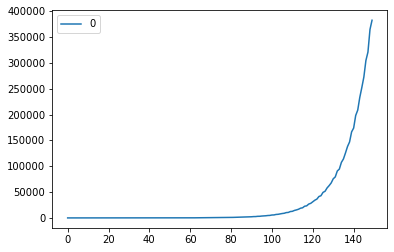

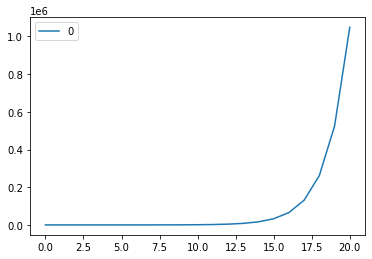

In [195]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def num_lanternfish_plot_one(ls, days):
    lss = []
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        lss.append(len(ls))
    pd.DataFrame(lss).plot()

num_lanternfish_plot_one([6],150)

lss = []
for i in range(int(150/7)):
    lss.append(math.pow(2,i))
pd.DataFrame(lss).plot()


In [206]:
# puzzle 2
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish_scale(ls, days):
    int_dic = {
        0:0,
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0,
    }
    for lanter in ls:
        int_dic[lanter]+=1
    for day in range(days):
        save8 = int_dic[0]
        for i in range(1,9):
            int_dic[i-1] = int_dic[i]
        int_dic[8] = save8
        int_dic[6]+= save8
    return int_dic

final_dic_ex = num_lanternfish_scale(day6_ex,256)
sm_ex = 0
for i in range(9):
    sm_ex+=final_dic_ex[i]
print(sm_ex)

final_dic = num_lanternfish_scale(day6,256)
sm = 0
for i in range(9):
    sm+=final_dic[i]
print(sm)



26984457539
1754597645339
